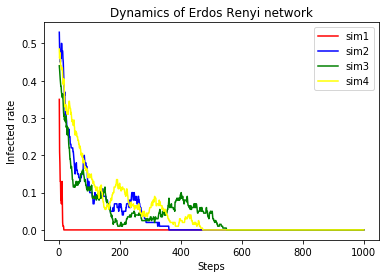

In [15]:
# part 1
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
import random as rd

def initialize(n, p_e):
    global g
    g = nx.erdos_renyi_graph(n, p_e)
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update(p_i, p_r):
    global g
    g_cloned = g
    for a in (list(g_cloned.nodes)):
        if g_cloned.nodes[a]['state'] == 0: # if susceptible
            b = rd.choice(list(g_cloned.neighbors(a)))
            if g_cloned.nodes[b]['state'] == 1: # if neighbor b is infected
                g.nodes[a]['state'] = 1 if random() < p_i else 0
        else: # if infected
            g.nodes[a]['state'] = 0 if random() < p_r else 1
    return g
def dynamics(n):
    global g
    infected = 0
    for a in list(g.nodes):
        if g.nodes[a]['state'] == 1:
            infected += 1
    infected_rate = infected / n
    return infected_rate
# import pycxsimulator
# pycxsimulatorv.GUI().start(func=[initialize, observe, update])

def Simulation(n, p_e, p_i, p_r, steps):
    n = n
    p_e = p_e
    p_i = p_i
    p_r = p_i
    step_list = [step+1 for step in range(steps)]
    infected_rates = []
    initialize(n, p_e)
    for step in range(steps):
        update(p_i, p_r)
        infected_rates.append(dynamics(n))
    return step_list, infected_rates
sim1 = Simulation(100, 0.1, 0.5, 0.5, 1000)
sim2 = Simulation(100, 0.1, 0.04, 0.5, 1000)
sim3 = Simulation(200, 0.1, 0.04, 0.5, 1000)
sim4 = Simulation(200, 0.05, 0.04, 0.5, 1000)
plt.plot(sim1[0], sim1[1], color="red", label="sim1")
plt.plot(sim2[0], sim2[1], color="blue",label="sim2")
plt.plot(sim3[0], sim3[1], color="green", label="sim3")
plt.plot(sim4[0], sim4[1], color="yellow", label="sim4")
plt.title("Dynamics of Erdos Renyi network")
plt.xlabel("Steps")
plt.ylabel("Infected rate")
plt.legend()
plt.show()

In [34]:
# part 2
n = 1000
m = 20000
p = 2*m / (n*(n-1))
g1 = nx.erdos_renyi_graph(n, p)
g2 = nx.watts_strogatz_graph(n, int(2*m/n), 0.5)
g3 = nx.barabasi_albert_graph(n, int(m/n))

def average_degree(g):
    degrees = 0
    for node in (list(g.nodes)):
        degrees += g.degree[node]
    ave_degree = degrees / n
    return ave_degree
print(average_degree(g1), average_degree(g2), average_degree(g3))

def ave_degree_neighbor(g):
    degrees = 0
    tot_neigh = 0
    for node in (list(g.nodes)):
        for neigh in list(g.neighbors(node)):
            degrees += g.degree[neigh]
        tot_neigh += len(list(g.neighbors(node)))
    ave_degree_neighbor = degrees / tot_neigh
    return ave_degree_neighbor
print(ave_degree_neighbor(g1), ave_degree_neighbor(g2), ave_degree_neighbor(g3))

40.596 40.0 39.2
41.68292442605183 40.3733 61.456683673469385
